In [0]:
class ImageMaker:
    def __init__(self, img):
        self.img = img
        self.h = self.img.shape[0]
        self.w = self.img.shape[1]
        self.d = self.img.shape[2]
        
        
    def gray(self):
        grayimg = 0.299*self.img[:,:,0] + 0.587*self.img[:,:,1] + 0.114*self.img[:,:,2]
        plt.imshow(grayimg, cmap=plt.get_cmap('gray'))
        plt.show()
        return grayimg
    
    
    def shift(self, direction, pixel):
        if direction == 'north' and pixel < self.h:
            black = np.zeros((pixel, self.w, self.d), dtype=np.uint8)
            shiftimg = np.concatenate((self.img[pixel:,:,:], black), axis=0)
            plt.imshow(shiftimg, cmap=plt.get_cmap('gray'))
            plt.show()
            return shiftimg
        elif direction == 'south' and pixel < self.h:
            black = np.zeros((pixel, self.w, self.d), dtype=np.uint8)
            shiftimg = np.concatenate((black, self.img[:-pixel,:,:]), axis=0)
            plt.imshow(shiftimg, cmap=plt.get_cmap('gray'))
            plt.show()
            return shiftimg
        elif direction == 'east' and pixel < self.w:
            black = np.zeros((self.h, pixel, self.d), dtype=np.uint8)
            shiftimg = np.concatenate((black, self.img[:,:-pixel,:]), axis=1)
            plt.imshow(shiftimg, cmap=plt.get_cmap('gray'))
            plt.show()
            return shiftimg
        elif direction == 'west' and pixel < self.w:
            black = np.zeros((self.h, pixel, self.d), dtype=np.uint8)
            shiftimg = np.concatenate((self.img[:,pixel:,:], black), axis=1)
            plt.imshow(shiftimg, cmap=plt.get_cmap('gray'))
            plt.show()
            return shiftimg
        else:
            print('Write direction parameter with (north, south, east, west) or pixel parameter again.')
    
    
    def rotate(self, angle):
        rotateimg = np.zeros((self.h,self.w,self.d))
        x0 = int(self.w/2)
        y0 = int(self.h/2)
        rad = np.pi/(180/angle)
        for j_ in range(self.h):
            for i_ in range(self.w):
                i = int((i_-x0)*np.cos(rad) + (j_-y0)*np.sin(rad) + x0)
                j = int((-1) * (i_-x0)*np.sin(rad) + (j_-y0)*np.cos(rad) + y0)
                if (0<=i<self.w) and (0<=j<self.h):
                    rotateimg[j_,i_,:] = self.img[j,i,:]
        plt.imshow(rotateimg.astype(np.int), cmap=plt.get_cmap('gray'))
        plt.show()
        return rotateimg
        
        
    def enlarge(self, ratio):
        if ratio >=1:
            enlargeimg = np.zeros((int(self.h*ratio),int(self.w*ratio),self.d))
            for j in range(int(self.h*ratio)):
                for i in range(int(self.w*ratio)):
                    enlargeimg[j,i,:] = self.img[int(j/ratio),int(i/ratio),:]
            x0 = int(enlargeimg.shape[1]/2)
            y0 = int(enlargeimg.shape[0]/2)
            enlargeimg = enlargeimg[y0-int(self.h/2):y0+int(self.h/2),x0-int(self.w/2):x0+int(self.w/2),:]
            plt.imshow(enlargeimg.astype(np.int), cmap=plt.get_cmap('gray'))
            plt.show()
            return enlargeimg
        else:
            print('Input ratio bigger than 1.0 again.')
        
        
    def shrink(self, ratio):
        if ratio <=1:
            shrinkimg = np.zeros(self.img.shape)
            for j in range(int(self.h*ratio)):
                for i in range(int(self.w*ratio)):
                    shrinkimg[j,i,:] = self.img[int(j/ratio),int(i/ratio),:]
            plt.imshow(shrinkimg.astype(np.int), cmap=plt.get_cmap('gray'))
            plt.show()
            return shrinkimg
        else:
            print('Input ratio smaller than 1.0 again.')

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


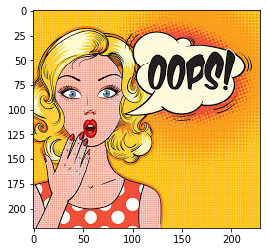

In [34]:
import numpy as np
import matplotlib.pyplot as plt



# 이미지 불러오기 및 출력

target = plt.imread('/gdrive/My Drive/전산통계/image/Oops.jpg')
plt.imshow(target, cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
# 인스턴스 생성

test = ImageMaker(target)

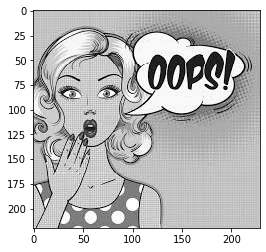

In [21]:
# gray
grayimg = test.gray()

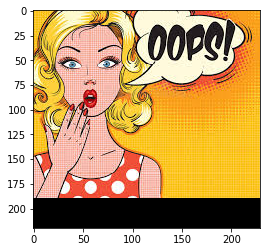

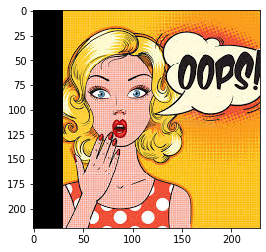

In [14]:
# shift
shiftimg1 = test.shift('north',30)
shiftimg2 = test.shift('east',30)

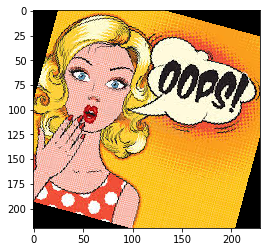

In [15]:
# rotate
rotateimg = test.rotate(15)

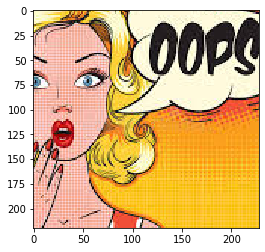

In [16]:
# enlarge
enlargeimg = test.enlarge(1.5)

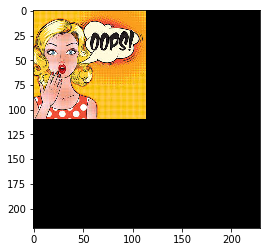

In [36]:
# shrink
shrinkimg = test.shrink(0.5)